# 와인 데이터세트로 4가지 ML 분류 + 기울기/절편 출력

### 1. LR


1. Logistic Regression - Knowledge Distillation
Epoch 01 - Distillation Loss: 0.2431
Epoch 02 - Distillation Loss: 0.2431
Epoch 03 - Distillation Loss: 0.2431
Epoch 04 - Distillation Loss: 0.2431
Epoch 05 - Distillation Loss: 0.2431
Epoch 06 - Distillation Loss: 0.2431
Epoch 07 - Distillation Loss: 0.2431
Epoch 08 - Distillation Loss: 0.2431
Epoch 09 - Distillation Loss: 0.2431
Epoch 10 - Distillation Loss: 0.2431
Epoch 11 - Distillation Loss: 0.2431
Epoch 12 - Distillation Loss: 0.2431
Epoch 13 - Distillation Loss: 0.2431
Epoch 14 - Distillation Loss: 0.2431
Epoch 15 - Distillation Loss: 0.2431
Epoch 16 - Distillation Loss: 0.2431
Epoch 17 - Distillation Loss: 0.2431
Epoch 18 - Distillation Loss: 0.2431
Epoch 19 - Distillation Loss: 0.2431
Epoch 20 - Distillation Loss: 0.2431
Epoch 21 - Distillation Loss: 0.2431
Epoch 22 - Distillation Loss: 0.2431
Epoch 23 - Distillation Loss: 0.2431
Epoch 24 - Distillation Loss: 0.2431
Epoch 25 - Distillation Loss: 0.2431
Epoch 26 - Distillation Los

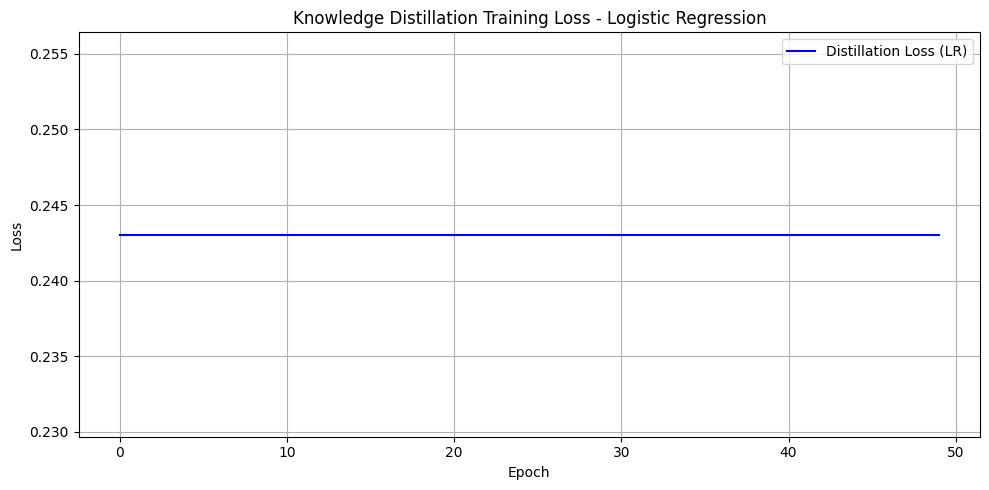

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.special import softmax

print("=" * 80)
print("1. Logistic Regression - Knowledge Distillation")
print("=" * 80)

# 1. 데이터 로딩 및 전처리
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Teacher 모델 훈련 (복잡하고 무거운 모델)
teacher_lr = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
teacher_lr.fit(X_train, y_train)

# 3. Student 모델 정의 (경량화 모델 - Logistic Regression)
student_lr = LogisticRegression(max_iter=1000, random_state=42, warm_start=True)

# 4. 지식 증류 손실 함수
def kl_divergence(p, q):
    return np.sum(p * (np.log(p + 1e-10) - np.log(q + 1e-10)), axis=1).mean()

def distillation_loss(student_logits, teacher_logits, true_labels, temperature=2.0, alpha=0.7):
    teacher_soft = softmax(teacher_logits / temperature, axis=1)
    student_soft = softmax(student_logits / temperature, axis=1)
    kd_loss = kl_divergence(teacher_soft, student_soft) * (temperature ** 2)
    ce_loss = -np.log(student_soft[range(len(true_labels)), true_labels] + 1e-10).mean()
    return alpha * kd_loss + (1 - alpha) * ce_loss

# 5. Student 훈련
losses_lr = []
student_lr.fit(X_train, y_train)  # 초기 학습

for epoch in range(50):
    # Logistic Regression 재학습
    student_lr.fit(X_train, y_train)
    
    teacher_logits = teacher_lr.predict_proba(X_train)
    student_logits = student_lr.predict_proba(X_train)
    
    loss = distillation_loss(student_logits, teacher_logits, y_train)
    losses_lr.append(loss)
    print(f"Epoch {epoch + 1:02d} - Distillation Loss: {loss:.4f}")

# 6. 평가
y_pred_teacher_lr = teacher_lr.predict(X_test)
y_pred_student_lr = student_lr.predict(X_test)

teacher_acc_lr = accuracy_score(y_test, y_pred_teacher_lr)
student_acc_lr = accuracy_score(y_test, y_pred_student_lr)

print("\n=== 최종 정확도 (Logistic Regression) ===")
print(f"Teacher 모델 정확도: {teacher_acc_lr * 100:.2f}%")
print(f"Student 모델 정확도: {student_acc_lr * 100:.2f}%")
print(f"기울기(Coefficients) 형태: {student_lr.coef_.shape}")
print(f"절편(Intercept): {student_lr.intercept_}")

# 7. 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(losses_lr, label='Distillation Loss (LR)', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Knowledge Distillation Training Loss - Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. DT

규칙 기반이라 가중치 개념이 없어서 기울기 및 절편이 존재하지 않음

Epoch 01 - Distillation Loss: 0.2383
Epoch 02 - Distillation Loss: 0.2383
Epoch 03 - Distillation Loss: 0.2383
Epoch 04 - Distillation Loss: 0.2383
Epoch 05 - Distillation Loss: 0.2383
Epoch 06 - Distillation Loss: 0.2383
Epoch 07 - Distillation Loss: 0.2383
Epoch 08 - Distillation Loss: 0.2383
Epoch 09 - Distillation Loss: 0.2383
Epoch 10 - Distillation Loss: 0.2383
Epoch 11 - Distillation Loss: 0.2383
Epoch 12 - Distillation Loss: 0.2383
Epoch 13 - Distillation Loss: 0.2383
Epoch 14 - Distillation Loss: 0.2383
Epoch 15 - Distillation Loss: 0.2383
Epoch 16 - Distillation Loss: 0.2383
Epoch 17 - Distillation Loss: 0.2383
Epoch 18 - Distillation Loss: 0.2383
Epoch 19 - Distillation Loss: 0.2383
Epoch 20 - Distillation Loss: 0.2383
Epoch 21 - Distillation Loss: 0.2383
Epoch 22 - Distillation Loss: 0.2383
Epoch 23 - Distillation Loss: 0.2383
Epoch 24 - Distillation Loss: 0.2383
Epoch 25 - Distillation Loss: 0.2383
Epoch 26 - Distillation Loss: 0.2383
Epoch 27 - Distillation Loss: 0.2383
E

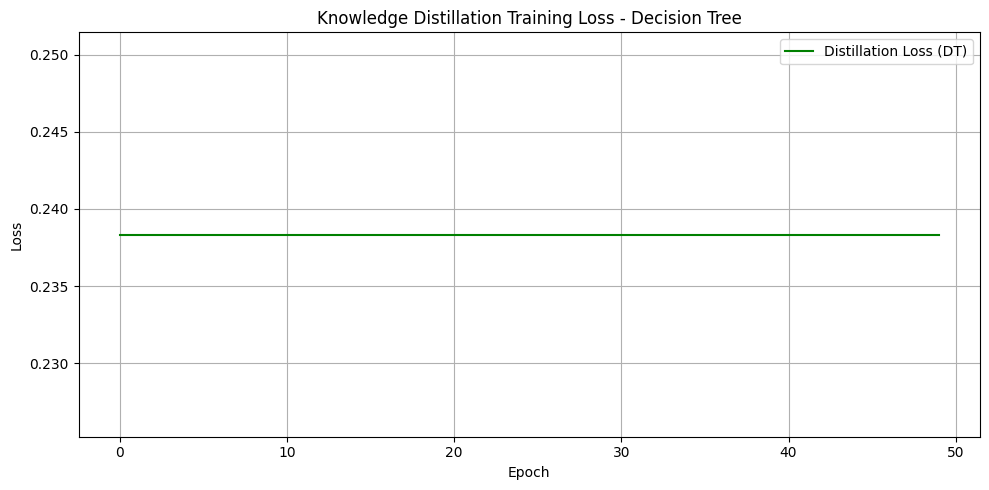

In [6]:
from sklearn.tree import DecisionTreeClassifier

# 1. 데이터 로딩 및 전처리
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Teacher 모델 훈련 (복잡하고 무거운 모델)
teacher_dt = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
teacher_dt.fit(X_train, y_train)

# 3. Student 모델 정의 (경량화 모델 - Decision Tree)
student_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# 4. 지식 증류 손실 함수
def kl_divergence(p, q):
    return np.sum(p * (np.log(p + 1e-10) - np.log(q + 1e-10)), axis=1).mean()

def distillation_loss(student_logits, teacher_logits, true_labels, temperature=2.0, alpha=0.7):
    teacher_soft = softmax(teacher_logits / temperature, axis=1)
    student_soft = softmax(student_logits / temperature, axis=1)
    kd_loss = kl_divergence(teacher_soft, student_soft) * (temperature ** 2)
    ce_loss = -np.log(student_soft[range(len(true_labels)), true_labels] + 1e-10).mean()
    return alpha * kd_loss + (1 - alpha) * ce_loss

# 5. Student 훈련
losses_dt = []
student_dt.fit(X_train, y_train)  # 초기 학습

for epoch in range(50):
    # Decision Tree 재학습
    student_dt = DecisionTreeClassifier(max_depth=5, random_state=42+epoch)
    student_dt.fit(X_train, y_train)
    
    teacher_logits = teacher_dt.predict_proba(X_train)
    student_logits = student_dt.predict_proba(X_train)
    
    loss = distillation_loss(student_logits, teacher_logits, y_train)
    losses_dt.append(loss)
    print(f"Epoch {epoch + 1:02d} - Distillation Loss: {loss:.4f}")

# 6. 평가
y_pred_teacher_dt = teacher_dt.predict(X_test)
y_pred_student_dt = student_dt.predict(X_test)

teacher_acc_dt = accuracy_score(y_test, y_pred_teacher_dt)
student_acc_dt = accuracy_score(y_test, y_pred_student_dt)

print("\n=== 최종 정확도 (Decision Tree) ===")
print(f"Teacher 모델 정확도: {teacher_acc_dt * 100:.2f}%")
print(f"Student 모델 정확도: {student_acc_dt * 100:.2f}%")
print(f"트리 깊이: {student_dt.get_depth()}")
print(f"노드 수: {student_dt.tree_.node_count}")

# 7. 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(losses_dt, label='Distillation Loss (DT)', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Knowledge Distillation Training Loss - Decision Tree')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# RF

여러 트리의 앙상블, 선형 가중치가 없음


Epoch 01 - Distillation Loss: 0.2458
Epoch 02 - Distillation Loss: 0.2452
Epoch 03 - Distillation Loss: 0.2454
Epoch 04 - Distillation Loss: 0.2445
Epoch 05 - Distillation Loss: 0.2453
Epoch 06 - Distillation Loss: 0.2455
Epoch 07 - Distillation Loss: 0.2451
Epoch 08 - Distillation Loss: 0.2451
Epoch 09 - Distillation Loss: 0.2449
Epoch 10 - Distillation Loss: 0.2463
Epoch 11 - Distillation Loss: 0.2465
Epoch 12 - Distillation Loss: 0.2447
Epoch 13 - Distillation Loss: 0.2448
Epoch 14 - Distillation Loss: 0.2454
Epoch 15 - Distillation Loss: 0.2459
Epoch 16 - Distillation Loss: 0.2460
Epoch 17 - Distillation Loss: 0.2460
Epoch 18 - Distillation Loss: 0.2458
Epoch 19 - Distillation Loss: 0.2459
Epoch 20 - Distillation Loss: 0.2453
Epoch 21 - Distillation Loss: 0.2462
Epoch 22 - Distillation Loss: 0.2459
Epoch 23 - Distillation Loss: 0.2450
Epoch 24 - Distillation Loss: 0.2451
Epoch 25 - Distillation Loss: 0.2462
Epoch 26 - Distillation Loss: 0.2466
Epoch 27 - Distillation Loss: 0.2453
E

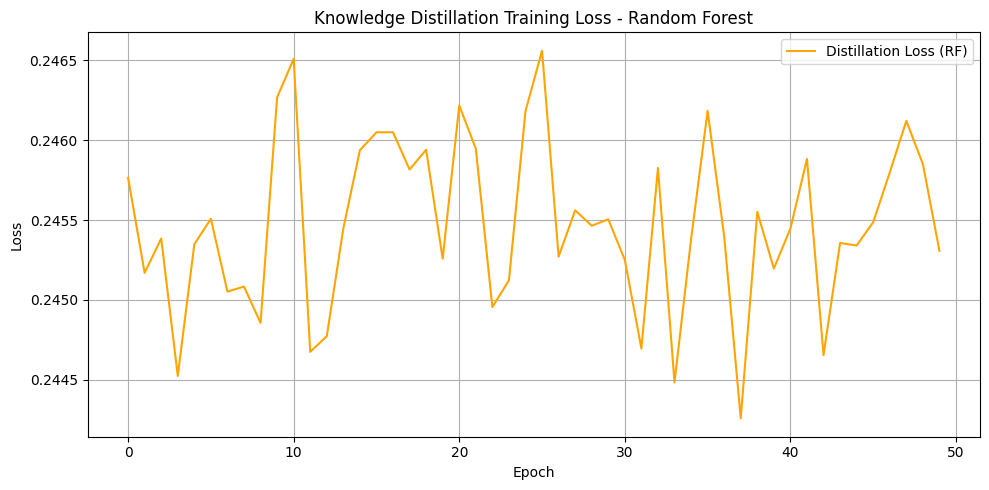

In [7]:
from sklearn.ensemble import RandomForestClassifier

# 1. 데이터 로딩 및 전처리
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Teacher 모델 훈련 (복잡하고 무거운 모델)
teacher_rf = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
teacher_rf.fit(X_train, y_train)

# 3. Student 모델 정의 (경량화 모델 - Random Forest)
student_rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# 4. 지식 증류 손실 함수
def kl_divergence(p, q):
    return np.sum(p * (np.log(p + 1e-10) - np.log(q + 1e-10)), axis=1).mean()

def distillation_loss(student_logits, teacher_logits, true_labels, temperature=2.0, alpha=0.7):
    teacher_soft = softmax(teacher_logits / temperature, axis=1)
    student_soft = softmax(student_logits / temperature, axis=1)
    kd_loss = kl_divergence(teacher_soft, student_soft) * (temperature ** 2)
    ce_loss = -np.log(student_soft[range(len(true_labels)), true_labels] + 1e-10).mean()
    return alpha * kd_loss + (1 - alpha) * ce_loss

# 5. Student 훈련
losses_rf = []
student_rf.fit(X_train, y_train)  # 초기 학습

for epoch in range(50):
    # Random Forest 재학습
    student_rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42+epoch)
    student_rf.fit(X_train, y_train)
    
    teacher_logits = teacher_rf.predict_proba(X_train)
    student_logits = student_rf.predict_proba(X_train)
    
    loss = distillation_loss(student_logits, teacher_logits, y_train)
    losses_rf.append(loss)
    print(f"Epoch {epoch + 1:02d} - Distillation Loss: {loss:.4f}")

# 6. 평가
y_pred_teacher_rf = teacher_rf.predict(X_test)
y_pred_student_rf = student_rf.predict(X_test)

teacher_acc_rf = accuracy_score(y_test, y_pred_teacher_rf)
student_acc_rf = accuracy_score(y_test, y_pred_student_rf)

print("\n=== 최종 정확도 (Random Forest) ===")
print(f"Teacher 모델 정확도: {teacher_acc_rf * 100:.2f}%")
print(f"Student 모델 정확도: {student_acc_rf * 100:.2f}%")
print(f"트리 개수: {len(student_rf.estimators_)}")
print(f"총 노드 수: {sum([tree.tree_.node_count for tree in student_rf.estimators_])}")

# 7. 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(losses_rf, label='Distillation Loss (RF)', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Knowledge Distillation Training Loss - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### KNN

거리 기반, 학습된 파라미터 자체가 존재하지 않음 


4. KNN - Knowledge Distillation
Epoch 01 - Distillation Loss: 0.2509
Epoch 02 - Distillation Loss: 0.2509
Epoch 03 - Distillation Loss: 0.2509
Epoch 04 - Distillation Loss: 0.2509
Epoch 05 - Distillation Loss: 0.2509
Epoch 06 - Distillation Loss: 0.2509
Epoch 07 - Distillation Loss: 0.2509
Epoch 08 - Distillation Loss: 0.2509
Epoch 09 - Distillation Loss: 0.2509
Epoch 10 - Distillation Loss: 0.2509
Epoch 11 - Distillation Loss: 0.2509
Epoch 12 - Distillation Loss: 0.2509
Epoch 13 - Distillation Loss: 0.2509
Epoch 14 - Distillation Loss: 0.2509
Epoch 15 - Distillation Loss: 0.2509
Epoch 16 - Distillation Loss: 0.2509
Epoch 17 - Distillation Loss: 0.2509
Epoch 18 - Distillation Loss: 0.2509
Epoch 19 - Distillation Loss: 0.2509
Epoch 20 - Distillation Loss: 0.2509
Epoch 21 - Distillation Loss: 0.2509
Epoch 22 - Distillation Loss: 0.2509
Epoch 23 - Distillation Loss: 0.2509
Epoch 24 - Distillation Loss: 0.2509
Epoch 25 - Distillation Loss: 0.2509
Epoch 26 - Distillation Loss: 0.2509
Epoch

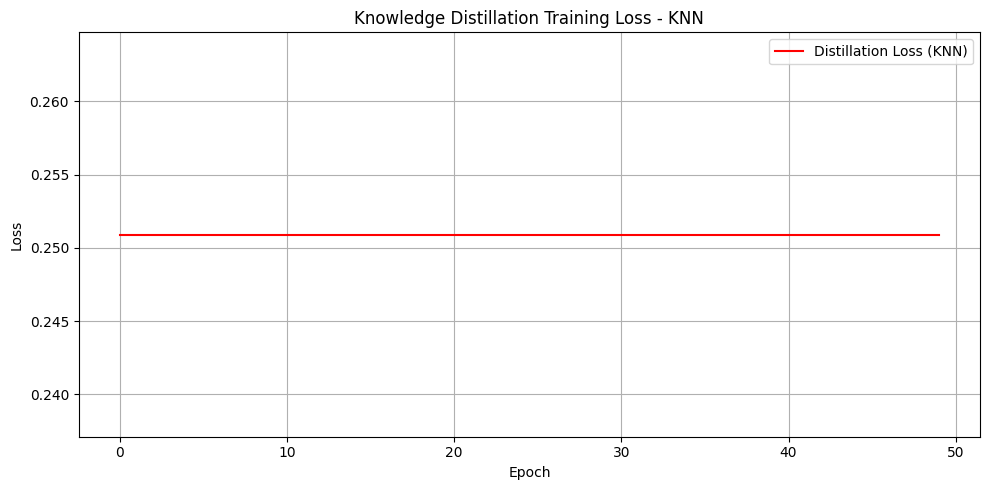

In [8]:
from sklearn.neighbors import KNeighborsClassifier

print("\n" + "=" * 80)
print("4. KNN - Knowledge Distillation")
print("=" * 80)

# 1. 데이터 로딩 및 전처리
data = load_wine()
X = StandardScaler().fit_transform(data.data)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Teacher 모델 훈련 (복잡하고 무거운 모델)
teacher_knn = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
teacher_knn.fit(X_train, y_train)

# 3. Student 모델 정의 (경량화 모델 - KNN)
student_knn = KNeighborsClassifier(n_neighbors=5)

# 4. 지식 증류 손실 함수
def kl_divergence(p, q):
    return np.sum(p * (np.log(p + 1e-10) - np.log(q + 1e-10)), axis=1).mean()

def distillation_loss(student_logits, teacher_logits, true_labels, temperature=2.0, alpha=0.7):
    teacher_soft = softmax(teacher_logits / temperature, axis=1)
    student_soft = softmax(student_logits / temperature, axis=1)
    kd_loss = kl_divergence(teacher_soft, student_soft) * (temperature ** 2)
    ce_loss = -np.log(student_soft[range(len(true_labels)), true_labels] + 1e-10).mean()
    return alpha * kd_loss + (1 - alpha) * ce_loss

# 5. Student 훈련
losses_knn = []
student_knn.fit(X_train, y_train)  # 초기 학습

for epoch in range(50):
    # KNN 재학습 (동일하게 유지, 손실만 계산)
    student_knn.fit(X_train, y_train)
    
    teacher_logits = teacher_knn.predict_proba(X_train)
    student_logits = student_knn.predict_proba(X_train)
    
    loss = distillation_loss(student_logits, teacher_logits, y_train)
    losses_knn.append(loss)
    print(f"Epoch {epoch + 1:02d} - Distillation Loss: {loss:.4f}")

# 6. 평가
y_pred_teacher_knn = teacher_knn.predict(X_test)
y_pred_student_knn = student_knn.predict(X_test)

teacher_acc_knn = accuracy_score(y_test, y_pred_teacher_knn)
student_acc_knn = accuracy_score(y_test, y_pred_student_knn)

print("\n=== 최종 정확도 (KNN) ===")
print(f"Teacher 모델 정확도: {teacher_acc_knn * 100:.2f}%")
print(f"Student 모델 정확도: {student_acc_knn * 100:.2f}%")
print(f"이웃 수(k): {student_knn.n_neighbors}")
print(f"저장된 훈련 샘플 수: {X_train.shape[0]}")

# 7. 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(losses_knn, label='Distillation Loss (KNN)', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Knowledge Distillation Training Loss - KNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
